In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    'model/keypoint_classifier/keypoint_classifier.keras', verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 10s 368ms/step - accuracy: 0.2266 - loss: 1.8565
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2860 - loss: 1.7513 - val_accuracy: 0.3100 - val_loss: 1.5518
Epoch 2/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3359 - loss: 1.5810
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3156 - loss: 1.5743 - val_accuracy: 0.2731 - val_loss: 1.4861
Epoch 3/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3359 - loss: 1.5235
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3168 - loss: 1.5123 - val_accuracy: 0.3309 - val_loss: 1.4451
Epoch 4/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3047 - loss: 1.4899
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6250 - loss: 0.9166
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6641 - loss: 0.8460 - val_accuracy: 0.8763 - val_loss: 0.5477
Epoch 26/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6328 - loss: 0.8520
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6652 - loss: 0.8185 - val_accuracy: 0.8707 - val_loss: 0.5356
Epoch 27/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7031 - loss: 0.8646
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6808 - loss: 0.8111 - val_accuracy: 0.8755 - val_loss: 0.5190
Epoch 28/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7188 - loss: 0.7296
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━

 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8047 - loss: 0.6652
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7464 - loss: 0.6937 - val_accuracy: 0.9124 - val_loss: 0.3771
Epoch 50/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7422 - loss: 0.6765
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7354 - loss: 0.6910 - val_accuracy: 0.9116 - val_loss: 0.3721
Epoch 51/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6875 - loss: 0.7622
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7421 - loss: 0.7036 - val_accuracy: 0.9141 - val_loss: 0.3657
Epoch 52/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7188 - loss: 0.7395
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━

 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7344 - loss: 0.6574
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7453 - loss: 0.6701 - val_accuracy: 0.9301 - val_loss: 0.3230
Epoch 74/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7812 - loss: 0.5616
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7589 - loss: 0.6197 - val_accuracy: 0.9213 - val_loss: 0.3244
Epoch 75/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7500 - loss: 0.6869
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7661 - loss: 0.6496 - val_accuracy: 0.9197 - val_loss: 0.3201
Epoch 76/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7188 - loss: 0.7032
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━

 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7734 - loss: 0.6060
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7732 - loss: 0.5949 - val_accuracy: 0.9365 - val_loss: 0.2975
Epoch 98/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7578 - loss: 0.6725
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.6061 - val_accuracy: 0.9229 - val_loss: 0.2986
Epoch 99/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7656 - loss: 0.5857
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7650 - loss: 0.5960 - val_accuracy: 0.9373 - val_loss: 0.2947
Epoch 100/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.6350
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━

 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7109 - loss: 0.6698
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7638 - loss: 0.6008 - val_accuracy: 0.9197 - val_loss: 0.2845
Epoch 122/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7891 - loss: 0.5923
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7889 - loss: 0.5756 - val_accuracy: 0.9181 - val_loss: 0.2873
Epoch 123/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7266 - loss: 0.6840
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7723 - loss: 0.5963 - val_accuracy: 0.9285 - val_loss: 0.2845
Epoch 124/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.5484
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.keras
30

 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.5697
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7867 - loss: 0.5742 - val_accuracy: 0.9205 - val_loss: 0.2759
Epoch 146/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7734 - loss: 0.7136
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7772 - loss: 0.5956 - val_accuracy: 0.9116 - val_loss: 0.2918
Epoch 147/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8047 - loss: 0.5099
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7801 - loss: 0.5880 - val_accuracy: 0.9181 - val_loss: 0.2786
Epoch 148/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8125 - loss: 0.5154
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.keras
30

 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8359 - loss: 0.4958
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7920 - loss: 0.5518 - val_accuracy: 0.9116 - val_loss: 0.2731
Epoch 170/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8125 - loss: 0.5437
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7918 - loss: 0.5582 - val_accuracy: 0.9108 - val_loss: 0.2778
Epoch 171/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8047 - loss: 0.4803
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7896 - loss: 0.5656 - val_accuracy: 0.9157 - val_loss: 0.2729
Epoch 172/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7969 - loss: 0.5124
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.keras
30

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.9191 - loss: 0.2717


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0.01676039 0.07942703 0.9038126 ]
2


# Confusion matrix

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step


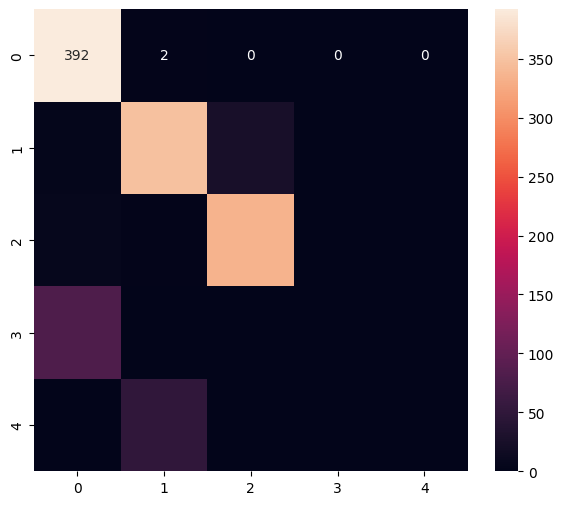

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       394
           1       0.87      0.92      0.89       378
           2       0.93      0.98      0.95       342
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00        50

    accuracy                           0.86      1245
   macro avg       0.52      0.58      0.55      1245
weighted avg       0.78      0.86      0.82      1245



/Users/rishinalem/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishinalem/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rishinalem/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/zg/1m9wz_hn11xgbtmm_1t209hr0000gn/T/tmpz1793c2q/assets


INFO:tensorflow:Assets written to: /var/folders/zg/1m9wz_hn11xgbtmm_1t209hr0000gn/T/tmpz1793c2q/assets


Saved artifact at '/var/folders/zg/1m9wz_hn11xgbtmm_1t209hr0000gn/T/tmpz1793c2q'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_1')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  13347662912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13347666608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13348323568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13348333072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13348339232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13348336592: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1722962523.020622 15751409 tf_tfl_flatbuffer_helpers.cc:361] Ignored output_format.
W0000 00:00:1722962523.020956 15751409 tf_tfl_flatbuffer_helpers.cc:364] Ignored drop_control_dependency.


6500

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 364 µs, sys: 846 µs, total: 1.21 ms
Wall time: 744 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.01676039 0.07942703 0.9038126 ]
2
